# CHIPPR

This notebook demonstrates the use of the Cosmological Hierarchical Inference with Probabilistic Photometric Redshifts (CHIPPR) package to estimate the redshift density function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from chippr import *

/Users/aimalz/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Simulation

## Inference

In [2]:
data_loc = '../../../prob-z/nz/code/tests/sig2/data/logdata.csv'

with open(data_loc,'rb') as data_file:
    tuples = (line.split(None) for line in data_file)
    data = [[float(pair[k]) for k in range(0,len(pair))] for pair in tuples]

In [3]:
zs = np.array(data[0])
nz_intp = np.array(data[1])
z_posts = np.array(data[2:])

print(np.shape(zs), np.shape(nz_intp), np.shape(z_posts))

zmids = (zs[1:]+zs[:-1])/2.
nbins = len(zmids)

((36,), (35,), (1022, 35))


In [4]:
prior_sigma = 0.16
prior_var = np.eye(nbins)
for b in range(nbins):
    prior_var[b] = 1. * np.exp(-0.5 * (zmids[b] - zmids) ** 2 / prior_sigma ** 2)
l = 1.e-4
prior_var = prior_var+l*np.identity(nbins)

In [5]:
nz = z_dens(data, prior_var, vb=True)

35 bins, 1022 interim posterior PDFs


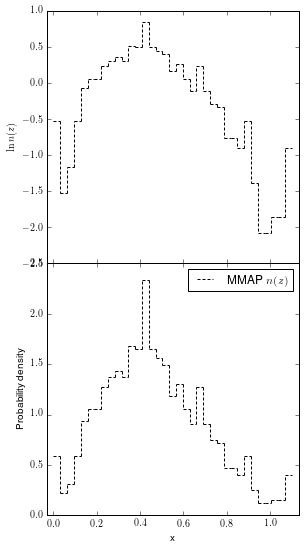

In [6]:
nz_mmap = nz.mmap()
nz.plot()

In [7]:
help(z_dens)

Help on class z_dens in module chippr.z_dens:

class z_dens(__builtin__.object)
 |  Methods defined here:
 |  
 |  __init__(self, data_list, hpvar, truth_fun=None, vb=True)
 |      An object representing the redshift density function (normalized redshift distribution function)
 |      
 |      Parameters
 |      ----------
 |      data_list: list
 |          list containing bin endpoints, logged interim prior bin values, and logged interim posterior PDF bin values
 |      hpvar: ndarray
 |          array of covariance matrix for hyperprior distribution
 |      truth_fun: function, optional
 |          function taking ndarray of redshifts to ndarray of true redshift density function values
 |      vb: boolean
 |          True to print progress messages to stdout, False to suppress
 |  
 |  mmap(self)
 |      Calculates the marginalized maximum a posteriori estimator of the redshift density function
 |      
 |      Returns
 |      -------
 |      log_mmap_dens: ndarray
 |          array

In [ ]:
nz_mexp = nz.mexp()

In [ ]:
nz_stack = nz.stack()

In [ ]:
nz_mmle = nz.infer(nz_lf)

In [ ]:
nz_samps = nz.sample(nz_lf)

In [ ]:
nz.plot()